# Import

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Exercice 1

## 1-a-1

In [1]:
def target_dist(x, y):
    return np.exp(- (x/a)**2 - y**2 - 0.25*((x/a)**2 - y**2)**2)

In [2]:
def P1(x, y, sigma1):
    proposal = np.random.normal(x, sigma1)
    alpha = min(1, target_dist(proposal, y) / target_dist(x, y))
    accepted = False
    if np.random.rand() < alpha:
        accepted = True
        return proposal, accepted
    return x, accepted

In [3]:
def P2(x, y, sigma2):
    proposal = np.random.normal(y, sigma2)
    accepted = False
    alpha = min(1, target_dist(x, proposal) / target_dist(x, y))
    if np.random.rand() < alpha:
        accepted = True
        return proposal, accepted
    return y, accepted

In [4]:
def gibbs_sampler(nb_echantillons, probabilite, etat_initial=(0, 0)):
    var_x, var_y = etat_initial
    echantillons = np.zeros((nb_echantillons, 2))

    accepte_x = []
    accepte_y = []
    lot_accepte_x = []
    lot_accepte_y = []

    for indice in range(nb_echantillons):
        
        tirage_uniforme = np.random.uniform()
        
        if np.random.uniform() < probabilite:

            
            var_x, accepte_actuel_x = P1(var_x, var_y, sigma_1)
            lot_accepte_x.append(accepte_actuel_x)
            
        else:
            var_y, accepte_actuel_y = P2(var_x, var_y, sigma_2)
            lot_accepte_y.append(accepte_actuel_y)

        echantillons[indice] = [var_x, var_y]

        if indice % 50 == 0:
            accepte_x.append(np.sum(lot_accepte_x) / 50)
            accepte_y.append(np.sum(lot_accepte_y) / 50)
            lot_accepte_x = []
            lot_accepte_y = []

    return echantillons, accepte_x, accepte_y

## 1-a-2

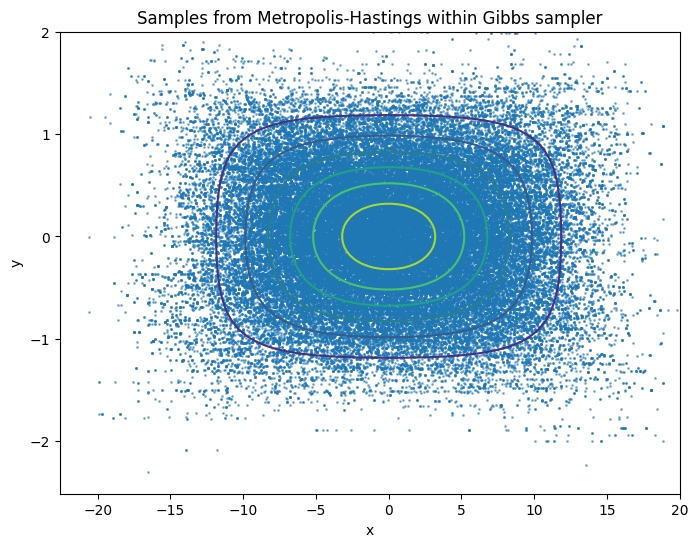

In [30]:
a = 10 
sigma_1 = 3
sigma_2 = 3
n_samples = 100000

initial_state = (0, 0) 

samples_non_adapt, accepted_x, accepted_y = gibbs(n_samples, 0.5, initial_state)

x = np.linspace(-20,20 ,100)
y = np.linspace(-2,2,100)
X, Y = np.meshgrid(x, y) 
Z = target_dist(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z)
plt.scatter(samples_non_adapt[:, 0], samples_non_adapt[:, 1], s=1, alpha=0.5)
plt.title("Samples from Metropolis-Hastings within Gibbs sampler")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

C:\Users\DAO.EZSPACE\AppData\Local\Temp\ipykernel_27708\1070410168.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


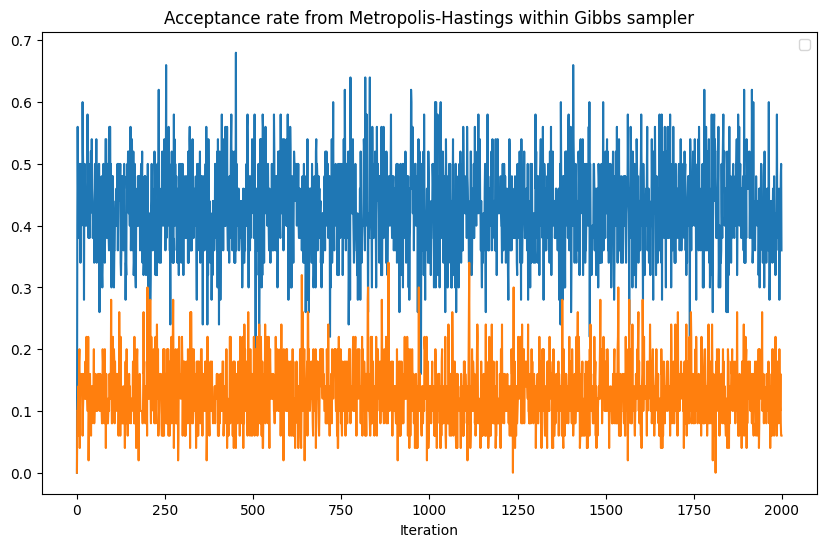

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(accepted_x)
plt.plot(accepted_y)
plt.xlabel("Iteration")
#plt.ylabel(r"$\alpha$ (taux d'acceptation)")
plt.title("Acceptance rate from Metropolis-Hastings within Gibbs sampler")
plt.legend()
plt.show()

Analysis of Sampling Performance

The plot shows that the algorithm's sampling performance is inadequate in its current configuration. A significant portion of sampled points lies outside the contours, reflecting a poor fit between the proposal distributions and the target distribution.

Furthermore, there is a notable discrepancy in the acceptance rates between the variables:
- The acceptance rate for \( x \) is excessively high, suggesting overly large steps that oversample certain regions.
- The acceptance rate for \( y \) is insufficient, indicating limited exploration of the \( y \)-dimension.

These imbalances reveal inefficiencies in the algorithm and suggest that the chosen standard deviations \( (\sigma_1, \sigma_2 = 3, 3) \) are not suitable for this case.


## 1-a-3

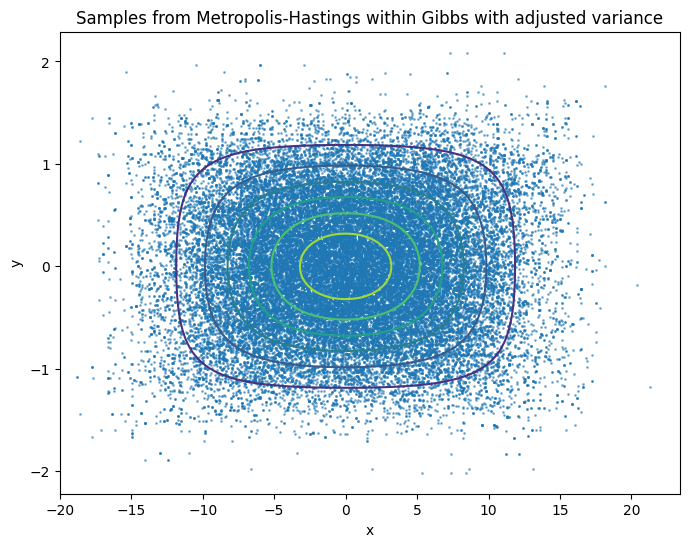

In [7]:
a = 10 
sigma_1 = 7
sigma_2 = 1
n_samples = 50000
initial_state = (1, 1) 

samples, accepted_x, accepted_y = gibbs_sampler(n_samples, 0.5, initial_state)

x = np.linspace(-20,20 ,100)
y = np.linspace(-2,2,100)

X, Y = np.meshgrid(x, y) 

Z = target_dist(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z)
plt.scatter(samples[:, 0], samples[:, 1], s=1, alpha=0.5)
plt.title("Samples from Metropolis-Hastings within Gibbs with adjusted variance")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

C:\Users\DAO.EZSPACE\AppData\Local\Temp\ipykernel_36340\292995362.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


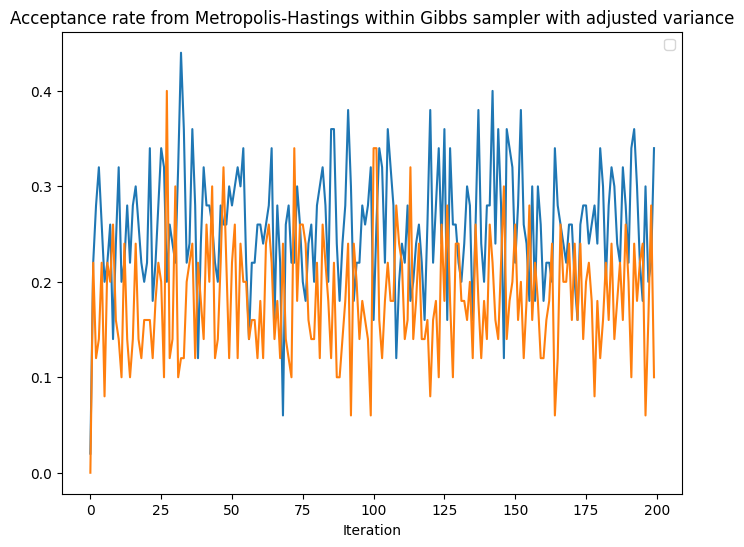

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(accepted_x)
plt.plot(accepted_y)
plt.xlabel("Iteration")


plt.title("Acceptance rate from Metropolis-Hastings within Gibbs sampler with adjusted variance")
plt.legend()
plt.show()

Improving Sampling Performance

By adjusting the proposal variances reducing the variance for \( y \) and increasing the variance for \( x \) we achieve significantly improved results. Most of the sampled points now lie within the contour plot, and the acceptance rates for both variables are much more balanced.


We can also change the probability of the kernel :

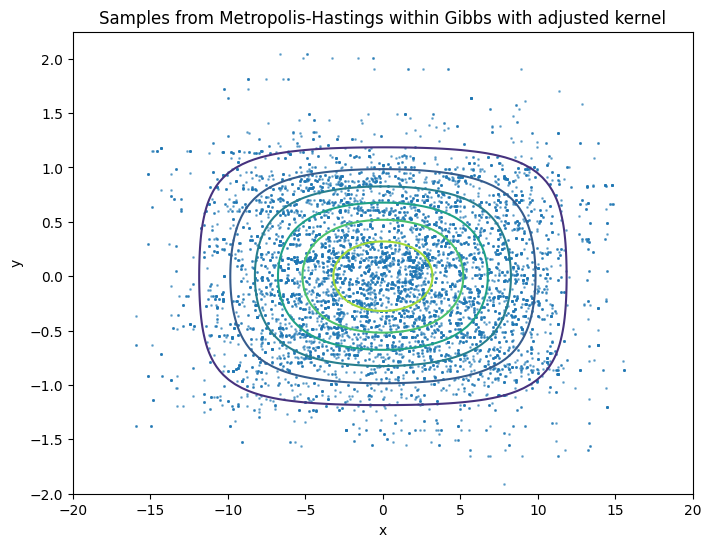

In [18]:
a = 10 
sigma_1 = 3
sigma_2 = 3
n_samples = 10000

initial_state = (1, 1) 

samples, accepted_x, accepted_y = gibbs_sampler(n_samples, 0.3, initial_state)

x = np.linspace(-20,20 ,100)
y = np.linspace(-2,2,100)
X, Y = np.meshgrid(x, y) 
Z = target_dist(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z)
plt.scatter(samples[:, 0], samples[:, 1], s=1, alpha=0.5)
plt.title("Samples from Metropolis-Hastings within Gibbs with adjusted kernel")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

C:\Users\DAO.EZSPACE\AppData\Local\Temp\ipykernel_36340\866321787.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


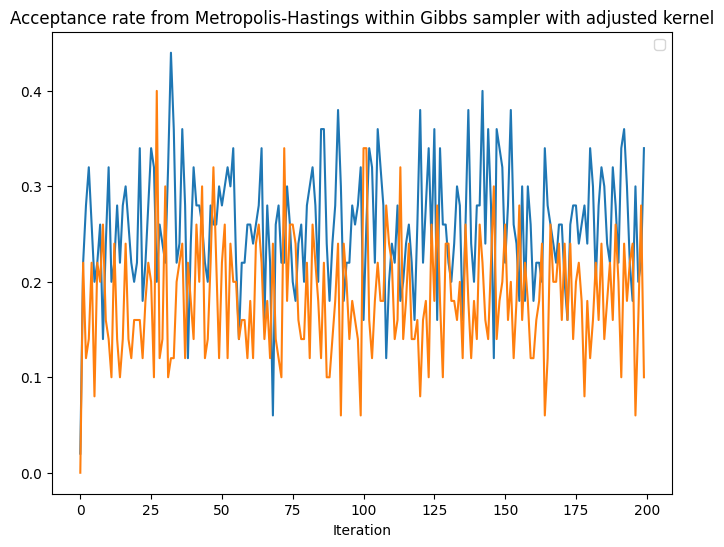

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(accepted_x)
plt.plot(accepted_y)
plt.xlabel("Iteration")



plt.title("Acceptance rate from Metropolis-Hastings within Gibbs sampler with adjusted kernel")
plt.legend()
plt.show()



By adjusting the proposal kernel to reduce the likelihood of sampling from \( x \), the results improve significantly. A larger proportion of sampled points fall within the contour plot, and the acceptance rates for \( x \) and \( y \) become more balanced, approaching the optimal value of 0.234. This indicates a more efficient and effective sampling process.


## 1-b-1

In [9]:
def adaptive_gibbs(n_iterations, probability, start_state=(0, 0)):
    current_x, current_y = start_state
    log_scale = np.zeros(2)
    results = np.zeros((n_iterations, 2))
    x_accept_rates, y_accept_rates = [], []
    x_batch_accepts, y_batch_accepts = [], []
    
    for iteration in range(n_iterations):
        if np.random.uniform() < probability:
            current_x, x_accepted = P1(current_x, current_y, np.exp(log_scale[0]))
            x_batch_accepts.append(x_accepted)
        else:
            current_y, y_accepted = P2(current_x, current_y, np.exp(log_scale[1]))
            y_batch_accepts.append(y_accepted)
        
        if iteration > 0 and iteration % 50 == 0:
            x_accept_rates.append(np.mean(x_batch_accepts))
            y_accept_rates.append(np.mean(y_batch_accepts))
            x_batch_accepts, y_batch_accepts = [], []
            adjustment = min(0.01, (iteration // 50) ** -0.5)
            log_scale[0] += adjustment if x_accept_rates[-1] >= 0.234 else -adjustment
            log_scale[1] += adjustment if y_accept_rates[-1] >= 0.234 else -adjustment
        
        results[iteration] = [current_x, current_y]
    
    return results, x_accept_rates, y_accept_rates


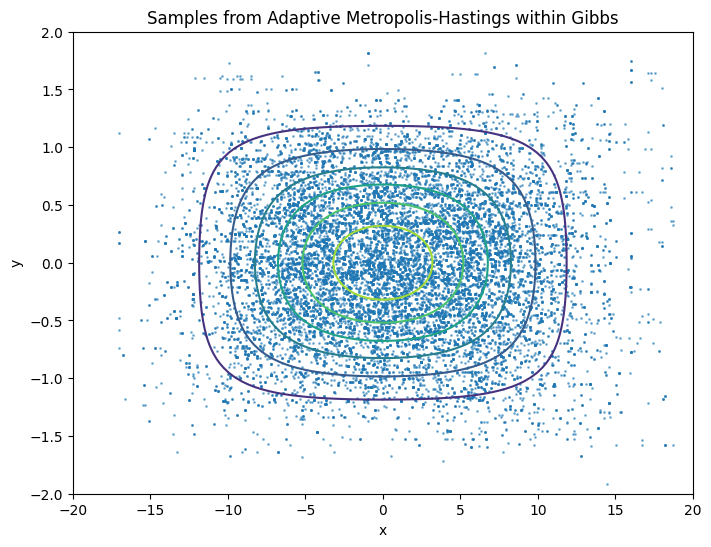

In [12]:
a = 10
variance_x = 3
variance_y = 3
num_iterations = 20000
start_state = (1, 1)

samples_adaptive, x_accept_rates, y_accept_rates = adaptive_gibbs(num_iterations, 0.5, start_state)

x_vals = np.linspace(-20, 20, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = target_dist(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z)
plt.scatter(samples_adaptive[:, 0], samples_adaptive[:, 1], s=1, alpha=0.5)
plt.title("Samples from Adaptive Metropolis-Hastings within Gibbs")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


C:\Users\DAO.EZSPACE\AppData\Local\Temp\ipykernel_20692\2936733392.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


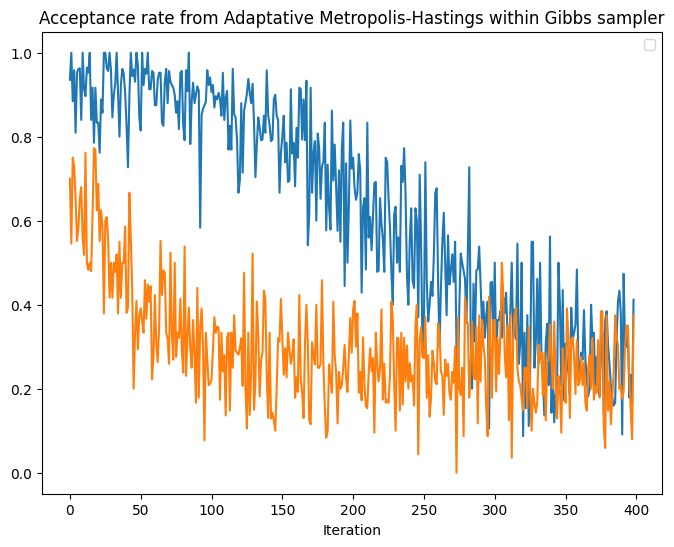

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(x_accept_rates)
plt.plot(y_accept_rates)
plt.xlabel("Iteration")

plt.title("Acceptance rate from Adaptative Metropolis-Hastings within Gibbs sampler")
plt.legend()
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\('
<>:4: SyntaxWarning: invalid escape sequence '\('
<>:9: SyntaxWarning: invalid escape sequence '\('
<>:10: SyntaxWarning: invalid escape sequence '\('
<>:3: SyntaxWarning: invalid escape sequence '\('
<>:4: SyntaxWarning: invalid escape sequence '\('
<>:9: SyntaxWarning: invalid escape sequence '\('
<>:10: SyntaxWarning: invalid escape sequence '\('
C:\Users\DAO.EZSPACE\AppData\Local\Temp\ipykernel_20692\2347163198.py:3: SyntaxWarning: invalid escape sequence '\('
  pd.plotting.autocorrelation_plot(samples_adaptive[:, 0], ax=axes[0], label='Autocorrelation of \(x\)', linewidth=2)
C:\Users\DAO.EZSPACE\AppData\Local\Temp\ipykernel_20692\2347163198.py:4: SyntaxWarning: invalid escape sequence '\('
  pd.plotting.autocorrelation_plot(samples_adaptive[:, 1], ax=axes[0], label='Autocorrelation of \(y\)', linewidth=2)
C:\Users\DAO.EZSPACE\AppData\Local\Temp\ipykernel_20692\2347163198.py:9: SyntaxWarning: invalid escape sequence '\('
  pd.plotti

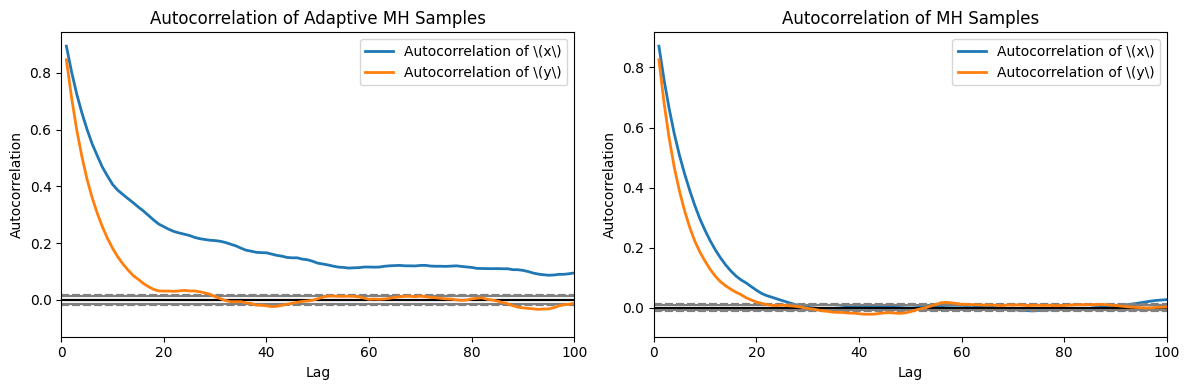

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

pd.plotting.autocorrelation_plot(samples_adaptive[:, 0], ax=axes[0], label='Autocorrelation of \(x\)', linewidth=2)
pd.plotting.autocorrelation_plot(samples_adaptive[:, 1], ax=axes[0], label='Autocorrelation of \(y\)', linewidth=2)
axes[0].set_xlim((0, 100))
axes[0].legend()
axes[0].set_title('Autocorrelation of Adaptive MH Samples')

pd.plotting.autocorrelation_plot(samples_non_adaptive[:, 0], ax=axes[1], label='Autocorrelation of \(x\)', linewidth=2)
pd.plotting.autocorrelation_plot(samples_non_adaptive[:, 1], ax=axes[1], label='Autocorrelation of \(y\)', linewidth=2)
axes[1].set_xlim((0, 100))
axes[1].legend()
axes[1].set_title('Autocorrelation of MH Samples')

plt.tight_layout()
plt.show()


## 1-b-2 The return of the dark banana

In [33]:
def banana_density(v):
    return np.exp(-(v[0]**2) / 200 - 0.5 * (v[1] + scale_factor * (v[0]**2) - 100 * scale_factor)**2 - 0.5 * np.sum(v[2:]**2))


In [34]:
def update_state(current, index, log_scale):
    proposal = np.random.normal(current[index], np.exp(log_scale[index]))
    candidate = np.copy(current)
    candidate[index] = proposal
    ratio = min(1, banana_density(candidate) / banana_density(current))
    return (candidate, True) if np.random.rand() < ratio else (current, False)


In [35]:
def adaptive_metropolis(samples_count, dimensions, start_state, probabilities):
    state = start_state
    scales = np.zeros(dimensions)
    samples = np.zeros((samples_count, dimensions))
    accepted = np.zeros((samples_count // 50, dimensions))
    batch_accept = np.zeros(dimensions)

    for step in range(samples_count):
        for dim in range(dimensions):
            if np.random.uniform() < probabilities[dim]:
                state, accepted_move = update_state(state, dim, scales)
                if accepted_move:
                    batch_accept[dim] += 1

        samples[step, :] = state

        if step % 50 == 0 and step > 0:
            batch_idx = step // 50
            accepted[batch_idx, :] = batch_accept / 50
            batch_accept = np.zeros(dimensions)
            adjustment = min(0.01, batch_idx**-0.5)
            scales += adjustment * (accepted[batch_idx, :] >= 0.234) - adjustment * (accepted[batch_idx, :] < 0.234)

    return samples, accepted


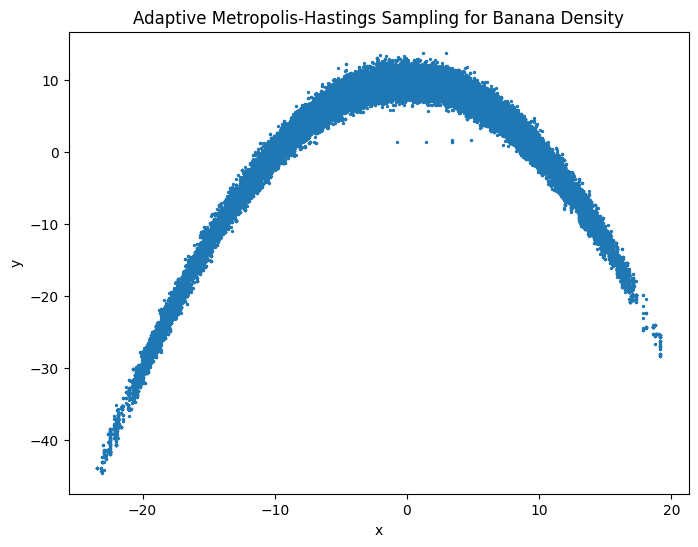

In [36]:
scale_factor = 0.1
dimensions = 20
probabilities = np.ones(dimensions)
samples_count = 100000
start_state = np.zeros(dimensions)

samples, acceptance_rates = adaptive_metropolis(samples_count, dimensions, start_state, probabilities)
plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], s=2)
plt.title("Adaptive Metropolis-Hastings Sampling for Banana Density")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

We achieve to obtain the dark banana reverse

# Exercise 2

## 2-a

In [60]:
from scipy.stats import multivariate_normal
import scipy.stats

In [ ]:
means = np.array([
    [2.18, 5.76], [8.67, 9.59], [4.24, 8.48], [8.41, 1.68],  
    [3.93, 8.82], [3.25, 3.47], [1.70, 0.50], [4.59, 5.60], 
    [6.91, 5.81], [6.87, 5.40], [5.41, 2.65], [2.70, 7.88], 
    [4.98, 3.70], [1.14, 2.39], [8.33, 9.50], [4.93, 1.50], 
    [1.83, 0.09], [2.26, 0.31], [5.54, 6.86], [1.69, 8.11]
])
weight = 0.05
std_dev = 0.1
initial_state = np.zeros(2)
num_samples = 4000


In [ ]:
def gaussian_mixture_density(point):
    total_density = 0
    for idx in range(20):
        total_density += weight * multivariate_normal(mean=means[idx], cov=np.ones(2) * std_dev).pdf(point)
    return total_density


In [ ]:
def metropolis_hastings_rw(samples_count, start):
    data = np.zeros((samples_count, 2))
    data[0, :] = start

    for step in range(samples_count):
        sample_x = np.random.normal(data[step - 1, 0], 1)
        proposal = np.array([sample_x, data[step - 1, 1]])
        current = data[step - 1, :]
        acceptance_ratio = min(1, gaussian_mixture_density(proposal) / gaussian_mixture_density(current))
        data[step, 0] = sample_x if np.random.rand() < acceptance_ratio else data[step - 1, 0]

        sample_y = np.random.normal(data[step - 1, 1], 1)
        proposal = np.array([data[step, 0], sample_y])
        current = np.array([data[step, 0], data[step - 1, 1]])
        acceptance_ratio = min(1, gaussian_mixture_density(proposal) / gaussian_mixture_density(current))
        data[step, 1] = sample_y if np.random.rand() < acceptance_ratio else data[step - 1, 1]

    return data

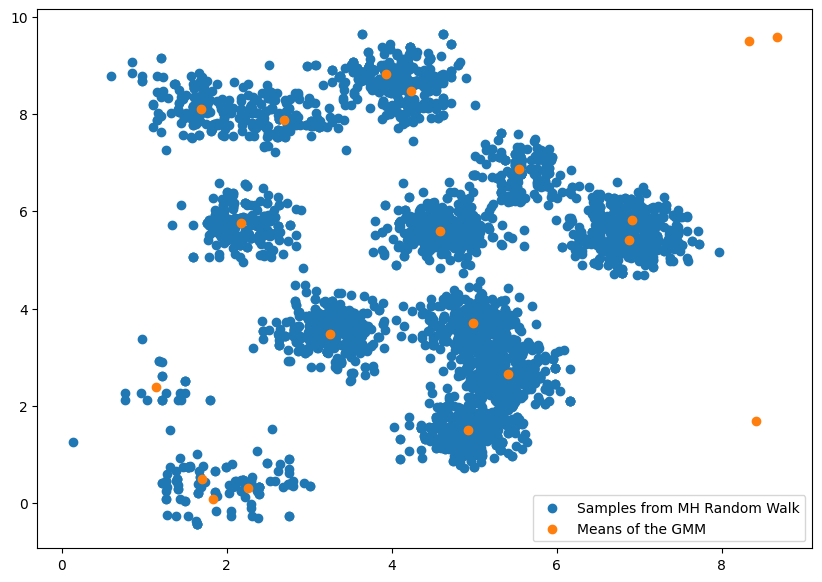

In [40]:
generated_samples = metropolis_hastings_rw(num_samples, initial_state)

plt.figure(figsize=(10, 7))
plt.scatter(generated_samples[:, 0], generated_samples[:, 1], label="Samples from MH Random Walk")
plt.scatter(means[:, 0], means[:, 1], label="Means of the GMM")
plt.legend()
plt.show()


The Metropolis-Hastings Symmetric Random Walk Algorithm struggles to effectively sample from all the means of the target distribution. This limitation arises from its difficulty in exploring the entire space of the mixture, particularly for means that are widely dispersed on the right. As a result, the algorithm often becomes confined to a subset of the means, failing to provide a comprehensive representation of the target distribution.

# 2-b

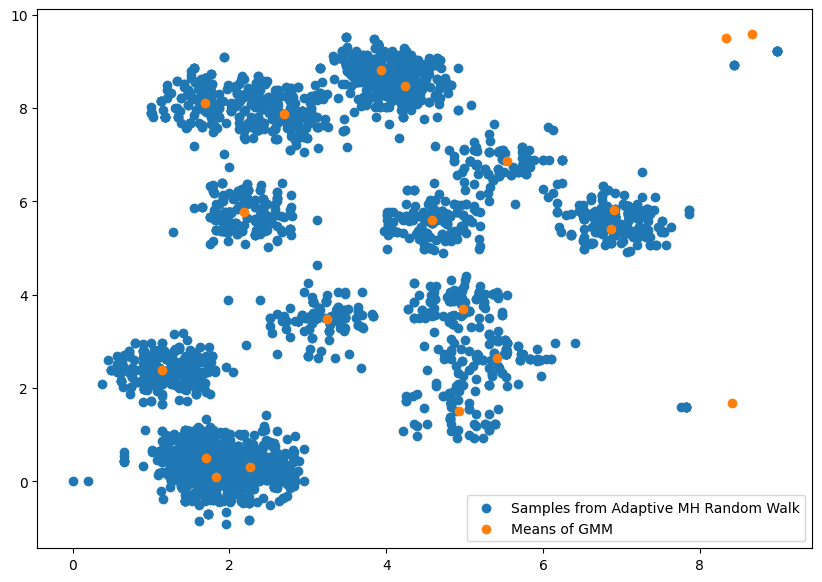

In [42]:
def adaptive_rw_metropolis(samples_count, initial_state): 
    data = np.zeros((samples_count, 2))
    data[0, :] = initial_state
    log_scales = np.zeros(2)
    accept_rate_x = 0
    accept_rate_y = 0

    for step in range(samples_count):
        sample_x = np.random.normal(data[step - 1, 0], np.exp(log_scales[0]))
        proposal = np.array([sample_x, data[step - 1, 1]])
        current = data[step - 1, :]
        accept_ratio = min(1, gaussian_mixture_density(proposal) / gaussian_mixture_density(current))
        
        if np.random.rand() < accept_ratio:
            data[step, 0] = sample_x
            accept_rate_x += 1
        else:
            data[step, 0] = data[step - 1, 0]

        sample_y = np.random.normal(data[step - 1, 1], np.exp(log_scales[1]))
        proposal = np.array([data[step, 0], sample_y])
        current = np.array([data[step, 0], data[step - 1, 1]])
        accept_ratio = min(1, gaussian_mixture_density(proposal) / gaussian_mixture_density(current))
        
        if np.random.rand() < accept_ratio:
            data[step, 1] = sample_y
            accept_rate_y += 1
        else:
            data[step, 1] = data[step - 1, 1]

        if step % 50 == 0 and step > 0:
            batch_index = step // 50
            adjustment = min(0.01, 1 / np.sqrt(batch_index))
            
            if accept_rate_x / 50 > 0.24:
                log_scales[0] += adjustment
            else:
                log_scales[0] -= adjustment
                
            if accept_rate_y / 50 > 0.24:
                log_scales[1] += adjustment
            else:
                log_scales[1] -= adjustment

            accept_rate_x = 0 
            accept_rate_y = 0 

    return data

generated_samples = adaptive_rw_metropolis(num_samples, initial_state)

plt.figure(figsize=(10, 7))
plt.scatter(generated_samples[:, 0], generated_samples[:, 1], label="Samples from Adaptive MH Random Walk")
plt.scatter(means[:, 0], means[:, 1], label="Means of GMM")
plt.legend()
plt.show()


The Adaptive Symmetric Random Walk Metropolis-Hastings Algorithm also fails to sample effectively from the top-right means, which are far from the rest of the distribution. This is why we will use tempered sampling to enhance the tail of each distribution.

In [53]:
def parallel_tempering(num_samples, temp_levels, initial_state):
    trajectories = np.zeros((len(temp_levels), num_samples, 2))
    trajectories[:, 0, :] = initial_state
    
    for step in range(num_samples):
        # Update samples
        for level in range(len(temp_levels)):
            proposed_x = np.random.normal(
                trajectories[level, step - 1, 0], 
                0.25 * np.sqrt(temp_levels[level])
            )
            proposal = np.array([proposed_x, trajectories[level, step - 1, 1]])
            current = trajectories[level, step - 1, :]
            acceptance_ratio = min(
                1, 
                (gaussian_mixture_density(proposal) ** (1 / temp_levels[level])) /
                (gaussian_mixture_density(current) ** (1 / temp_levels[level]))
            )
            if np.random.rand() < acceptance_ratio:
                trajectories[level, step, 0] = proposed_x
            else:
                trajectories[level, step, 0] = trajectories[level, step - 1, 0]
            
            proposed_y = np.random.normal(
                trajectories[level, step - 1, 1], 
                0.25 * np.sqrt(temp_levels[level])
            )
            proposal = np.array([trajectories[level, step, 0], proposed_y])
            current = np.array([trajectories[level, step, 0], trajectories[level, step - 1, 1]])
            acceptance_ratio = min(
                1,
                gaussian_mixture_density(proposal) /
                gaussian_mixture_density(current)
            )
            if np.random.rand() < acceptance_ratio:
                trajectories[level, step, 1] = proposed_y
            else:
                trajectories[level, step, 1] = trajectories[level, step - 1, 1]
        
        # Swap temperatures
        idx = np.random.randint(0, len(temp_levels))
        neighbor_idx = idx + 1 if idx == 0 else (idx - 1 if idx == len(temp_levels) - 1 else np.random.choice([idx - 1, idx + 1]))
        
        num = (
            gaussian_mixture_density(trajectories[neighbor_idx, step, :]) ** (1 / temp_levels[idx]) *
            gaussian_mixture_density(trajectories[idx, step, :]) ** (1 / temp_levels[neighbor_idx])
        )
        den = (
            gaussian_mixture_density(trajectories[idx, step, :]) ** (1 / temp_levels[idx]) *
            gaussian_mixture_density(trajectories[neighbor_idx, step, :]) ** (1 / temp_levels[neighbor_idx])
        )
        swap_acceptance_ratio = min(1, num / den)
        
        if np.random.rand() < swap_acceptance_ratio:
            trajectories[idx, step, :], trajectories[neighbor_idx, step, :] = (
                trajectories[neighbor_idx, step, :].copy(),
                trajectories[idx, step, :].copy()
            )
    
    return trajectories



In [ ]:
temperature_levels = [60, 21.6, 7.7, 2.8, 1]
trajectory_samples = parallel_tempering(num_samples, temperature_levels, initial_state)


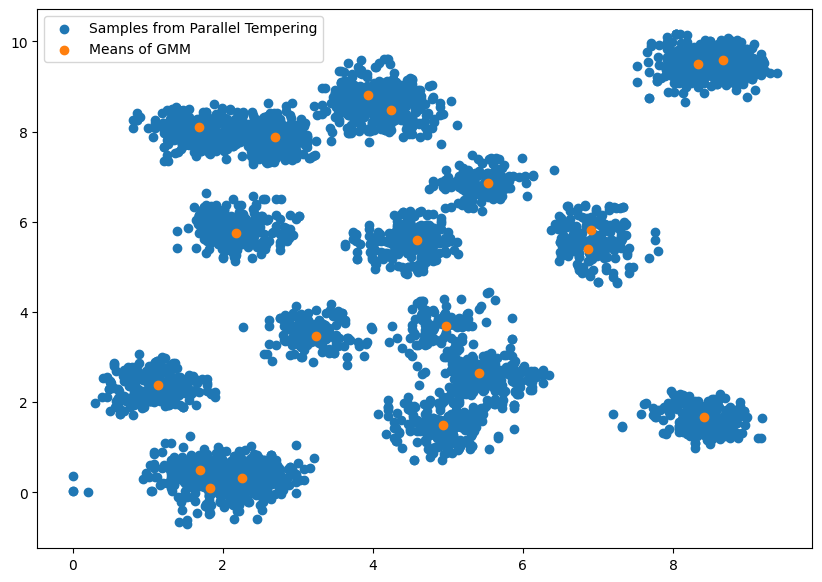

In [52]:

plt.figure(figsize=(10, 7))
plt.scatter(
    trajectory_samples[-1, :, 0], trajectory_samples[-1, :, 1], 
    label='Samples from Parallel Tempering'
)
plt.scatter(means[:, 0], means[:, 1], label='Means of GMM')
plt.legend()
plt.show()


The Parallel Tempering algorithm effectively facilitates sampling from all the means of the Gaussian mixture, demonstrating its capability to thoroughly explore the entire distribution.

# Exercise 3

In [61]:
import scipy.stats as stats

### 1. Posterior Distribution

We aim to compute the posterior distribution given the observations \( Y_{i,j} \):

#### General Expression

The posterior is proportional to:

$$
P(X, \mu, \sigma^2, \tau^2 \mid Y) \propto P(Y, X \mid \mu, \sigma^2, \tau^2) P(\mu, \sigma^2, \tau^2)
$$

Using the chain rule:

$$
P(X, \mu, \sigma^2, \tau^2 \mid Y) \propto P(Y \mid X, \mu, \sigma^2, \tau^2) P(X \mid \mu, \sigma^2, \tau^2) P(\mu, \sigma^2, \tau^2)
$$

#### Likelihood of \( Y \)

Given \( Y_{i,j} = X_i + \epsilon_{i,j} \) and \( \epsilon_{i,j} \sim \mathcal{N}(0, \tau^2) \):

$$
P(Y \mid X, \mu, \sigma^2, \tau^2) \propto \left(\frac{1}{\tau^2}\right)^{\frac{k}{2}} \exp\left(-\frac{\sum_{i=1}^N \sum_{j=1}^{k_i} (y_{i,j} - X_i)^2}{2 \tau^2}\right)
$$

#### Prior of \( X \)

For \( X_i \sim \mathcal{N}(\mu, \sigma^2) \):

$$
P(X \mid \mu, \sigma^2, \tau^2) \propto \left(\frac{1}{\sigma^2}\right)^{\frac{N}{2}} \exp\left(-\frac{\sum_{i=1}^N (X_i - \mu)^2}{2 \sigma^2}\right)
$$

#### Prior of Parameters

The prior for \( (\mu, \sigma^2, \tau^2) \) is:

$$
P(\mu, \sigma^2, \tau^2) \propto \frac{1}{\sigma^{2(1+\alpha)}} \exp\left(-\frac{\beta}{\sigma^2}\right) \cdot \frac{1}{\tau^{2(1+\gamma)}} \exp\left(-\frac{\beta}{\tau^2}\right)
$$

#### Combined Posterior

Combining these terms gives:

$$
P(X, \mu, \sigma^2, \tau^2 \mid Y) \propto 
\left(\frac{1}{\tau^2}\right)^{\frac{k}{2}} \exp\left(-\frac{\sum_{i=1}^N \sum_{j=1}^{k_i} (y_{i,j} - X_i)^2}{2 \tau^2}\right) 
\cdot \left(\frac{1}{\sigma^2}\right)^{\frac{N}{2}} \exp\left(-\frac{\sum_{i=1}^N (X_i - \mu)^2}{2 \sigma^2}\right) 
\cdot \frac{1}{\sigma^{2(1+\alpha)}} \exp\left(-\frac{\beta}{\sigma^2}\right) 
\cdot \frac{1}{\tau^{2(1+\gamma)}} \exp\left(-\frac{\beta}{\tau^2}\right)
$$

#### Simplified Expression

The simplified posterior becomes:

$$
P(X, \mu, \sigma^2, \tau^2 \mid Y) \propto 
\left(\frac{1}{\tau^2}\right)^{\frac{k}{2} + \gamma + 1} 
\left(\frac{1}{\sigma^2}\right)^{\frac{N}{2} + \alpha + 1} 
\exp\left(
-\frac{\sum_{i=1}^N \sum_{j=1}^{k_i} (y_{i,j} - X_i)^2}{2 \tau^2} 
-\frac{\sum_{i=1}^N (X_i - \mu)^2}{2 \sigma^2} 
-\frac{\beta}{\sigma^2} 
-\frac{\beta}{\tau^2}
\right)
$$


### 2. Posterior Distributions

#### Posterior for \( \sigma^2 \)

From the posterior distribution above, the posterior for \( \sigma^2 \) is:

$$
P(\sigma^2 \mid Y, X, \mu, \tau^2) \propto \left(\frac{1}{\sigma^2}\right)^{\frac{N}{2} + \alpha + 1}
\exp\left(-\frac{\sum_{i}^N (X_i - \mu)^2}{2 \sigma^2} - \frac{\beta}{\sigma^2}\right)
$$

This is recognised as an Inverse Gamma Distribution:

$$
P(\sigma^2 \mid Y, X, \mu, \tau^2) \propto \Gamma^{-1}\left(\frac{N}{2} + \alpha, \frac{\sum_{i}^N (X_i - \mu)^2}{2} + \beta\right)
$$

#### Posterior for \( \tau^2 \)

Similarly, for \( \tau^2 \):

$$
P(\tau^2 \mid Y, X, \mu, \sigma^2) \propto \left(\frac{1}{\tau^2}\right)^{\frac{k}{2} + \gamma + 1}
\exp\left(-\frac{\sum_{i}^N \sum_{j=1}^{k_i} (y_{i,j} - X_i)^2}{2 \tau^2} - \frac{\beta}{\tau^2}\right)
$$

This is also recognised as an Inverse Gamma Distribution:

$$
P(\tau^2 \mid Y, X, \mu, \sigma^2) \propto \Gamma^{-1}\left(\frac{k}{2} + \gamma, \frac{\sum_{i}^N \sum_{j=1}^{k_i} (y_{i,j} - X_i)^2}{2} + \beta\right)
$$

#### Posterior for \( \mu \)

The posterior for \( \mu \) is given by:

$$
P(\mu \mid Y, X, \sigma^2, \tau^2) \propto \exp\left(-\frac{\sum_{i}^N (X_i - \mu)^2}{2 \sigma^2}\right)
$$

Rewriting, we have:

$$
P(\mu \mid Y, X, \sigma^2, \tau^2) \propto \exp\left( - \frac{2 \mu \sum_{i}^N X_i}{2 \sigma^2} + \frac{N \mu^2}{2 \sigma^2}\right)
$$

This simplifies to:

$$
P(\mu \mid Y, X, \sigma^2, \tau^2) \propto \exp\left(-\frac{\left(\frac{\sum_{i}^N X_i}{N} - \mu\right)^2}{\frac{2 \sigma^2}{N}}\right)
$$

We recognise this as a Normal distribution:

$$
P(\mu \mid Y, X, \sigma^2, \tau^2) \propto \mathcal{N}\left(\frac{\sum_{i}^N X_i}{N}, \frac{\sigma^2}{N}\right)
$$

#### Posterior for \( X \)

For \( X \), the posterior is:

$$
P(X \mid \mu, \sigma^2, \tau^2, Y) \propto \prod_{i=1}^N \exp\left(
-\frac{\sum_{j=1}^{k_i} (y_{i,j} - X_i)^2}{2 \tau^2} 
-\frac{(X_i - \mu)^2}{2 \sigma^2}
\right)
$$

Expanding:

$$
\propto \prod_{i=1}^N \exp\left( 
-X_i^2 \left(\frac{1}{2\sigma^2} + \frac{k_i}{2\tau^2}\right) + 
X_i \left(\frac{2\mu}{2\sigma^2} + \frac{2\sum_{j=1}^{k_i} y_{i,j}}{2\tau^2}\right) - 
\left(\frac{\mu^2}{2\sigma^2} + \frac{\sum_{j=1}^{k_i} y_{i,j}^2}{2\tau^2}\right)
\right)
$$

Simplifying:

$$
\propto \prod_{i=1}^N \exp\left( 
-\frac{\left(X_i - \frac{\tau^2 \mu + \sigma^2 \sum_{j=1}^{k_i} y_{i,j}}{\tau^2 + k_i \sigma^2}\right)^2}{2 \frac{\sigma^2 \tau^2}{\tau^2 + k_i \sigma^2}}
\right)
$$

Thus, for each \( i \):

$$
P(X_i \mid \mu, \sigma^2, \tau^2, Y) \sim \mathcal{N}(\hat{\mu}_i, \hat{\sigma}_i^2)
$$

where:

- \( \hat{\mu}_i = \frac{\tau^2 \mu + \sigma^2 \sum_{j=1}^{k_i} y_{i,j}}{k_i \sigma^2 + \tau^2} \)
- \( \hat{\sigma}_i^2 = \frac{\sigma^2 \tau^2}{k_i \sigma^2 + \tau^2} \)

#### Gibbs Sampler Algorithm

We can now implement the following Gibbs sampler algorithm, assuming \( \forall i, \, k_i = k \).


In [56]:
def gibbs_sampler(initial_sigma, initial_tau, initial_mu, initial_X, observations, num_individuals, num_observations, beta, alpha, gamma, num_samples):
    sampled_sigma = np.zeros(num_samples)
    sampled_tau = np.zeros(num_samples)
    sampled_mu = np.zeros(num_samples)
    sampled_X = np.zeros((num_samples, num_individuals))

    current_mu = initial_mu
    current_tau = initial_tau
    current_sigma = initial_sigma
    current_X = initial_X

    for iteration in range(num_samples):
        current_sigma = stats.invgamma.rvs(
            num_individuals / 2 + alpha,
            scale=(beta + np.sum((current_X - current_mu)**2) / 2)
        )
        current_tau = stats.invgamma.rvs(
            num_individuals * num_observations / 2 + gamma,
            scale=(beta + np.sum((observations.T - current_X)**2) / 2)
        )
        current_mu = np.random.normal(
            loc=np.mean(current_X),
            scale=current_sigma / num_individuals
        )
        current_X = np.zeros(num_individuals)
        for individual in range(num_individuals):
            variance = current_sigma * current_tau / (num_observations * current_sigma + current_tau)
            mean = (current_tau * current_mu + current_sigma * np.sum(observations[individual, :])) / (num_observations * current_sigma + current_tau)
            current_X[individual] = np.random.normal(mean, scale=variance)

        sampled_sigma[iteration] = current_sigma
        sampled_tau[iteration] = current_tau
        sampled_mu[iteration] = current_mu
        sampled_X[iteration] = current_X

    return sampled_sigma, sampled_tau, sampled_mu, sampled_X

### 3. Joint Posterior Distribution

Let us compute the joint posterior distribution \( P(X, \mu \mid Y, \sigma^2, \tau^2) \):

$$
P(X, \mu \mid Y, \sigma^2, \tau^2) \propto \prod_{i=1}^N \exp\left(-\frac{\sum_{j=1}^{k_i} (y_{i,j} - X_i)^2}{2\tau^2} - \frac{(X_i - \mu)^2}{2\sigma^2}\right)
$$

Expanding the terms:

$$
\propto \prod_{i=1}^N \exp\left(-\frac{\sum_{j=1}^{k_i} (y_{i,j}^2 - 2y_{i,j}X_i + X_i^2)}{2\tau^2} - \frac{X_i^2 - 2\mu X_i + \mu^2}{2\sigma^2}\right)
$$

Simplifying:

$$
\propto \prod_{i=1}^N \exp\left(-\frac{1}{2} \left( \frac{\sigma^2 k_i + \tau^2}{\tau^2 \sigma^2} X_i^2 - \frac{2 \sum_{j=1}^{k_i} y_{i,j} X_i}{\tau^2} - \frac{2 X_i \mu}{\sigma^2} + \frac{\mu^2}{\sigma^2}\right) \right)
$$

We recognise this as a multivariate Gaussian distribution:

$$
P(X, \mu \mid Y, \sigma^2, \tau^2) \propto \exp\left( -\frac{1}{2} (X - \mu)^T \Sigma^{-1} (X - \mu) \right)
$$

where the covariance matrix is:

$$
\Sigma = \begin{bmatrix}
\text{diag}\left(\frac{\sigma^2 k_i + \tau^2}{\tau^2 \sigma^2}\right) & -\frac{1}{\sigma^2}\mathbf{1} \\
-\frac{1}{\sigma^2}\mathbf{1}^T & \frac{N}{\sigma^2}
\end{bmatrix}
$$

and the mean vector is given by:

$$
\text{mean} = \Sigma^{-1} \begin{bmatrix}
\frac{\sum_{j=1}^{k_i} y_{i,j}}{\tau^2} \\
0
\end{bmatrix}
$$


In [57]:
def block_gibbs_sampler(initial_sigma, initial_tau, initial_mu, initial_X, observations, num_individuals, num_observations, beta, alpha, gamma, num_samples):
    sampled_sigma = np.zeros(num_samples)
    sampled_tau = np.zeros(num_samples)
    sampled_mu = np.zeros(num_samples)
    sampled_X = np.zeros((num_samples, num_individuals))

    current_mu = initial_mu
    current_tau = initial_tau
    current_sigma = initial_sigma
    current_X = initial_X

    for iteration in range(num_samples):
        current_sigma = stats.invgamma.rvs(
            num_individuals / 2 + alpha,
            scale=(beta + np.sum((current_X - current_mu)**2) / 2)
        )
        current_tau = stats.invgamma.rvs(
            num_individuals * num_observations / 2 + gamma,
            scale=(beta + np.sum((observations - current_X[:, np.newaxis])**2) / 2)
        )
        precision_matrix = np.zeros((num_individuals + 1, num_individuals + 1))
        for i in range(num_individuals):
            precision_matrix[i, i] = num_observations / current_tau + 1 / current_sigma
        precision_matrix[num_individuals, num_individuals] = num_individuals / current_sigma
        for i in range(num_individuals):
            precision_matrix[i, num_individuals] = -1 / current_sigma
            precision_matrix[num_individuals, i] = -1 / current_sigma
        mean_vector = np.zeros(num_individuals + 1)
        for i in range(num_individuals):
            mean_vector[i] = np.sum(observations[i, :]) / current_tau
        mean_vector[num_individuals] = 0
        covariance_matrix = np.linalg.inv(precision_matrix)
        mean_vector = covariance_matrix @ mean_vector
        joint_sample = np.random.multivariate_normal(mean_vector, covariance_matrix)

        current_X = joint_sample[:num_individuals]
        current_mu = joint_sample[num_individuals]

        sampled_sigma[iteration] = current_sigma
        sampled_tau[iteration] = current_tau
        sampled_mu[iteration] = current_mu
        sampled_X[iteration] = current_X

    return sampled_sigma, sampled_tau, sampled_mu, sampled_X


### 4. 

In a Gibbs sampler, parameters are updated one at a time by sampling from their full conditional distributions while keeping all other parameters fixed. This approach is straightforward to implement but can lead to slow mixing when variables are highly correlated, as more iterations are required to adequately capture their relationships.

In contrast, the block Gibbs sampler updates correlated parameters simultaneously as a block. This often results in faster convergence but may require sampling from more complex distributions.

In our case, this approach is particularly effective. By updating \( X_i \) and \( \mu \) together, we achieve the exact mean of \( Y_{i,j} \). Since \( X_i \) is drawn from a Gaussian distribution with mean \( \mu \), updating them as a block efficiently captures their dependency, resulting in faster and more accurate convergence.


In [65]:
num_individuals = 300
num_observations = 100

alpha = 0.1
beta = 0.1
gamma = 0.1

true_mu = 4
true_sigma = 1
true_tau = 1

initial_sigma = 2
initial_tau = 2
initial_mu = 2
initial_X = np.zeros(num_individuals)

num_samples = 1000

observations = np.zeros((num_individuals, num_observations))
for individual in range(num_individuals):
    true_X_i = np.random.normal(true_mu, true_sigma)
    noise = np.random.normal(0, true_tau, size=num_observations)
    observations[individual, :] = true_X_i + noise

sigma_samples, tau_samples, mu_samples, X_samples = gibbs_sampler(
    initial_sigma, initial_tau, initial_mu, initial_X,
    observations, num_individuals, num_observations,
    beta, alpha, gamma, num_samples
)



In [66]:
print('Mean for sigma:', np.mean(sigma_samples))
print('Mean for mu:', np.mean(mu_samples))
print('Mean for tau:', np.mean(tau_samples))
print('Mean for X_i:', np.mean(X_samples))

Mean for sigma: 0.9639606778924061
Mean for mu: 4.056109638693289
Mean for tau: 1.0081095753067035
Mean for X_i: 4.060143530641177


In [ ]:
sigma_samples, tau_samples, mu_samples, X_samples = block_gibbs_sampler(
    initial_sigma, initial_tau, initial_mu, initial_X,
    observations, num_individuals, num_observations,
    beta, alpha, gamma, num_samples
)


In [63]:

print('Mean for sigma:', np.mean(sigma_samples))
print('Mean for mu:', np.mean(mu_samples))
print('Mean for tau:', np.mean(tau_samples))
print('Mean for X_i:', np.mean(X_samples))


Mean for sigma: 0.9945351749232626
Mean for mu: 3.968200329676649
Mean for tau: 1.027927874676654
Mean for X_i: 3.9671792281256564


Both algorithms produced comparable results for \( X_i \) and \( \mu \). However, significant differences were observed for the variance parameters \( \tau \) and \( \sigma \), with the Block Gibbs Sampler yielding more precise and reliable outcomes.
